In [16]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

print(os.getcwd())


/home/patricia/Schreibtisch/Projekte/Hackathon Gruene


In [3]:
df_btw = pd.read_excel("BTW_2025_Wahlbezirke_endg.xlsx", header=0) #Identifikationsschlüssel

In [4]:
gdf_btw1 = gpd.read_file("SHP_BTW2025/23_WK_3_BTW2025.shp")
gdf_btw2 = gpd.read_file("SHP_BTW2025/23_WK_4_BTW2025.shp")
gdf_btw2 = gdf_btw2.to_crs(gdf_btw1.crs)
gdf_btw = pd.concat([gdf_btw1, gdf_btw2], ignore_index=True)
gdf_ltw = gpd.read_file("Geodaten_LW2026_RP/LW2026_RP_LK_3_GEMSTT.shp")

<Axes: >

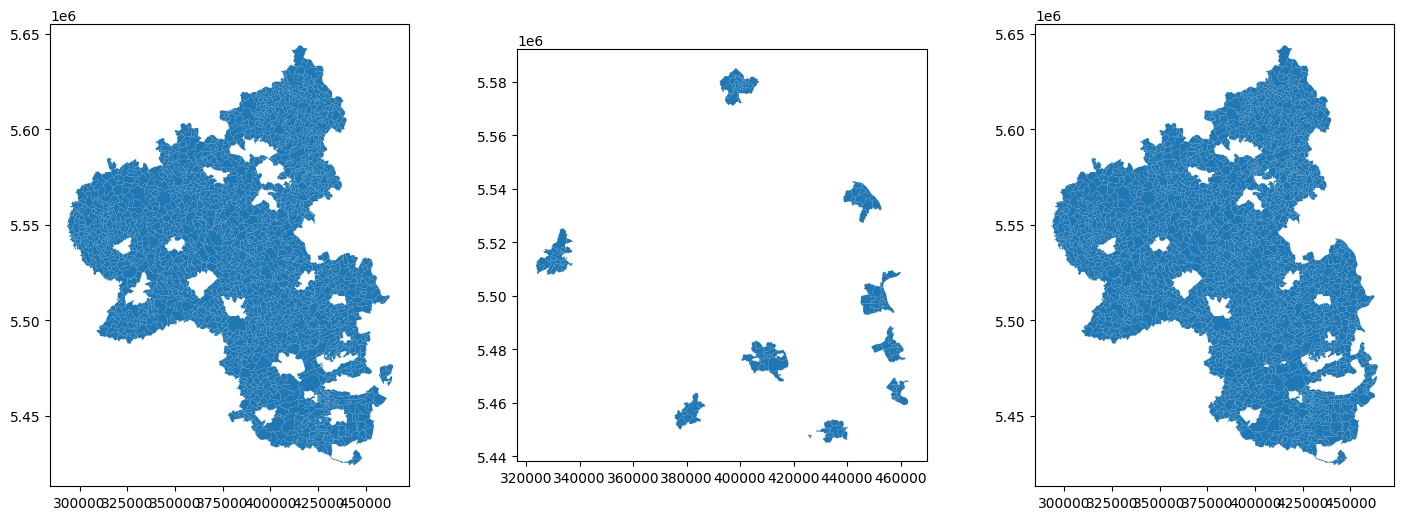

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 Zeile, 3 Spalten

gdf_btw1.plot(ax=axes[0])
gdf_btw2.plot(ax=axes[1])
gdf_btw.plot(ax=axes[2])

In [6]:
gdf_btw.head()

,name,bezeichnun,parent,level,geometry
0,Boos,1971370301400,1971370300000,3,"POLYGON ((360096.676 5576057.449, 360078.093 5..."
1,Brauneberg,1992310101200,1992310100000,3,"POLYGON ((356322.071 5530722.877, 356334.886 5..."
2,Alsdorf,1961320900200,1961320900000,3,"POLYGON ((421489.353 5626322.436, 421449.346 5..."
3,Kratzenburg,1991400907500,1991400900000,3,"POLYGON ((396381.799 5563163.841, 396604.985 5..."
4,Queidersbach,2093351103700,2093351100000,3,"POLYGON ((402291.671 5472424.391, 403064.924 5..."


In [7]:
print(df_btw['Identifikationsschlüssel'].head())
print(gdf_btw['bezeichnun'].head())

df_btw['key'] = df_btw['Identifikationsschlüssel'].apply(str)
gdf_btw['key'] = gdf_btw['bezeichnun'].apply(str)

0    196132030000000000
1    196132030000000000
2    196132030000000000
3    196132030180000000
4    196132030180000000
Name: Identifikationsschlüssel, dtype: int64
0    1971370301400
1    1992310101200
2    1961320900200
3    1991400907500
4    2093351103700
Name: bezeichnun, dtype: object


In [8]:
print(df_btw['key'].apply(lambda x: len(x)).unique())
print(gdf_btw['key'].apply(lambda x: len(x)).unique())
df_btw['key'] = df_btw['key'].apply( lambda x: x[:13])

[18]
[13]


In [ ]:
grouped = df_btw[['Identifikationsschlüssel', 'Bezeichnung Wahlbezirk','gültige Zweit', 'Z_GRÜNE.1', 'key']].groupby('key')

In [25]:
# Gewichtetes Mittel in df_btw
df_reduced = None
for g in grouped.groups:
    df = grouped.get_group(g)
    if df.shape[0] == 1:
        w_mean = df
    else:
        w_mean = df.iloc[0]
        w_mean['Z_GRÜNE.1'] = np.sum([x*y for x,y in zip(df['Z_GRÜNE.1'],df['gültige Zweit'])]) / df['gültige Zweit'].sum()
        w_mean = w_mean.to_frame().T
    if df_reduced is None:
        df_reduced = w_mean
    else:
        df_reduced = pd.concat([df_reduced, w_mean], ignore_index=True) 


/tmp/ipykernel_4588/3830029354.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_mean['Z_GRÜNE.1'] = np.sum([x*y for x,y in zip(df['Z_GRÜNE.1'],df['gültige Zweit'])]) / df['gültige Zweit'].sum()
/tmp/ipykernel_4588/3830029354.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_mean['Z_GRÜNE.1'] = np.sum([x*y for x,y in zip(df['Z_GRÜNE.1'],df['gültige Zweit'])]) / df['gültige Zweit'].sum()
/tmp/ipykernel_4588/3830029354.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [27]:
test = gdf_btw.merge(df_reduced, how='inner', on='key')
print(test.shape[0])
print(gdf_btw.shape[0])
print(df_btw.shape[0])

2401
2404
5482


In [15]:
result = gdf_ltw.overlay(test, how='intersection')

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 4546 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


In [ ]:
result[['26_NAM', '26_IDEN', 'name', 'bezeichnun', 'parent', 'level', 'key',
       'Identifikationsschlüssel', 'Bezeichnung Wahlbezirk',
       'E_GRÜNE.1', 'Z_GRÜNE.1']]

,26_NAM,26_IDEN,name,bezeichnun,parent,level,key,Identifikationsschlüssel,Bezeichnung Wahlbezirk,E_GRÜNE.1,Z_GRÜNE.1
0,Frankenthal - Nord,3353110000020,Heßheim,2063380601200,2063380600000,3,2063380601200,206338060120000000,Heßheim (1),3.9,6.1
1,Frankenthal - Nord,3353110000020,Heßheim,2063380601200,2063380600000,3,2063380601200,206338060120000000,Heßheim (2),6.6,6.3
2,Frankenthal - Nord,3353110000020,Beindersheim,2063380600200,2063380600000,3,2063380600200,206338060020000000,Beindersheim (1),4.5,6.0
3,Frankenthal - Nord,3353110000020,Beindersheim,2063380600200,2063380600000,3,2063380600200,206338060020000000,Beindersheim (2),6.4,7.2
4,Frankenthal - West,3353110000050,Heßheim,2063380601200,2063380600000,3,2063380601200,206338060120000000,Heßheim (1),3.9,6.1
...,...,...,...,...,...,...,...,...,...,...,...
27208,Neustadt an der Weinstraße/Pfälzerwald,4433160000099,Esthal,2073320501600,2073320500000,3,2073320501600,207332050160000000,Esthal Urne,4.5,4.8
27209,Neustadt an der Weinstraße/Pfälzerwald,4433160000099,Esthal,2073320501600,2073320500000,3,2073320501600,207332050160000000,Esthal Briefwahl,6.3,7.8
27210,Neustadt an der Weinstraße/Pfälzerwald,4433160000099,Lambrecht (Pfalz),2073320503200,2073320500000,3,2073320503200,207332050320000000,Lambrecht Urne,7.1,8.4
27211,Neustadt an der Weinstraße/Pfälzerwald,4433160000099,Lambrecht (Pfalz),2073320503200,2073320500000,3,2073320503200,207332050320000000,Lambrecht I Briefwahl,5.5,6.8


In [31]:
from pyrosm import OSM

# Bounding Box für Speyer [west, south, east, north]
bbox_speyer = [8.42, 49.31, 8.44, 49.33]
osm = OSM("rheinland-pfalz-251020.osm.pbf", bounding_box=bbox_speyer)

# Danach get_network ohne bounding_box-Parameter aufrufen
roads_speyer = osm.get_network(network_type="driving")



/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/pyrosm/networks.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edges, nodes = prepare_geodataframe(


In [78]:
roads_speyer_crs = roads_speyer.to_crs(test.crs)
speyer_gruene = gpd.sjoin(test, roads_speyer_crs, how='inner')

print(speyer_gruene.shape)

(1120, 58)


In [79]:
cols = [col for col in speyer_gruene.columns if col != speyer_gruene.geometry.name]
speyer_gruene_df = pd.DataFrame(speyer_gruene[cols])
ergebnis_gruene_speyer = speyer_gruene_df.loc[:,["name_left", "name_right", "bezeichnun", "Bezeichnung Wahlbezirk", "Z_GRÜNE.1"]].drop_duplicates()

In [80]:
ergebnis_gruene_speyer.to_excel("speyer_btw_2025.xlsx")

In [81]:
# Worms
bbox_worms = [8.32, 49.61, 8.37, 49.64]
osm = OSM("rheinland-pfalz-251020.osm.pbf", bounding_box=bbox_worms)

# Danach get_network ohne bounding_box-Parameter aufrufen
roads_worms = osm.get_network(network_type="driving")
roads_worms_crs = roads_worms.to_crs(test.crs)
worms_gruene = gpd.sjoin(test, roads_worms_crs, how='inner')

print(worms_gruene.shape)
cols = [col for col in worms_gruene.columns if col != worms_gruene.geometry.name]
worms_gruene_df = pd.DataFrame(worms_gruene[cols])
ergebnis_gruene_worms = worms_gruene_df.loc[:,["name_left", "name_right", "bezeichnun", "Bezeichnung Wahlbezirk", "Z_GRÜNE.1"]].drop_duplicates()
ergebnis_gruene_worms.to_excel("worms_btw_2025.xlsx")

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/pyrosm/networks.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edges, nodes = prepare_geodataframe(


(2181, 60)
